In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv")
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [9]:
df.shape

(213, 11)

In [11]:
df.columns.tolist()

['1',
 '1.52101',
 '13.64',
 '4.49',
 '1.10',
 '71.78',
 '0.06',
 '8.75',
 '0.00',
 '0.00.1',
 '1.1']

In [13]:
df.dtypes

1            int64
1.52101    float64
13.64      float64
4.49       float64
1.10       float64
71.78      float64
0.06       float64
8.75       float64
0.00       float64
0.00.1     float64
1.1          int64
dtype: object

In [14]:
df.isnull().sum()

1          0
1.52101    0
13.64      0
4.49       0
1.10       0
71.78      0
0.06       0
8.75       0
0.00       0
0.00.1     0
1.1        0
dtype: int64

In [15]:
df.describe()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [16]:
names = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','glass_type']
df.columns = names
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [17]:
df = df.drop('Id',1)

In [18]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


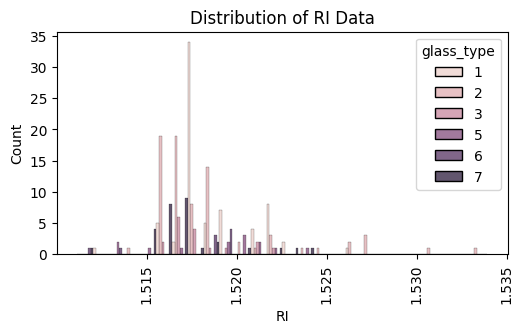

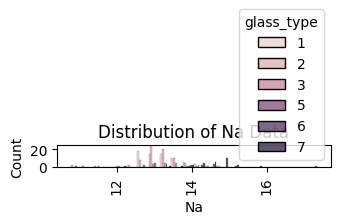

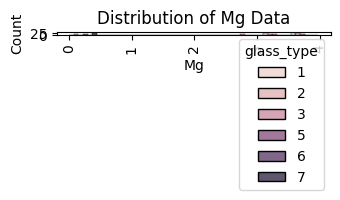

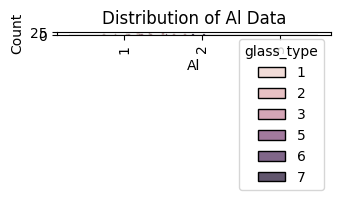

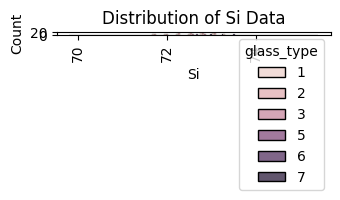

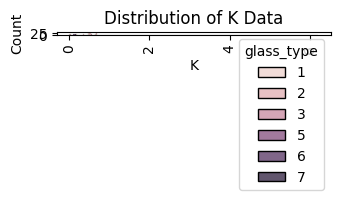

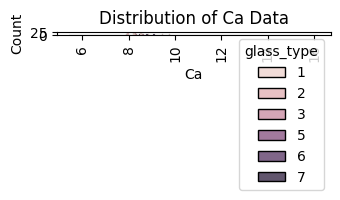

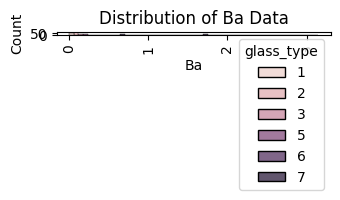

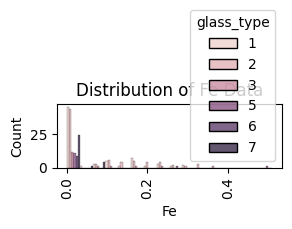

In [43]:
plt.figure(figsize = (10, 15))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(5, 2, i)
    sns.histplot(x=df[col], hue=df['glass_type'], multiple = 'dodge')
    plt.title(f"Distribution of {col} Data")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

<Axes: >

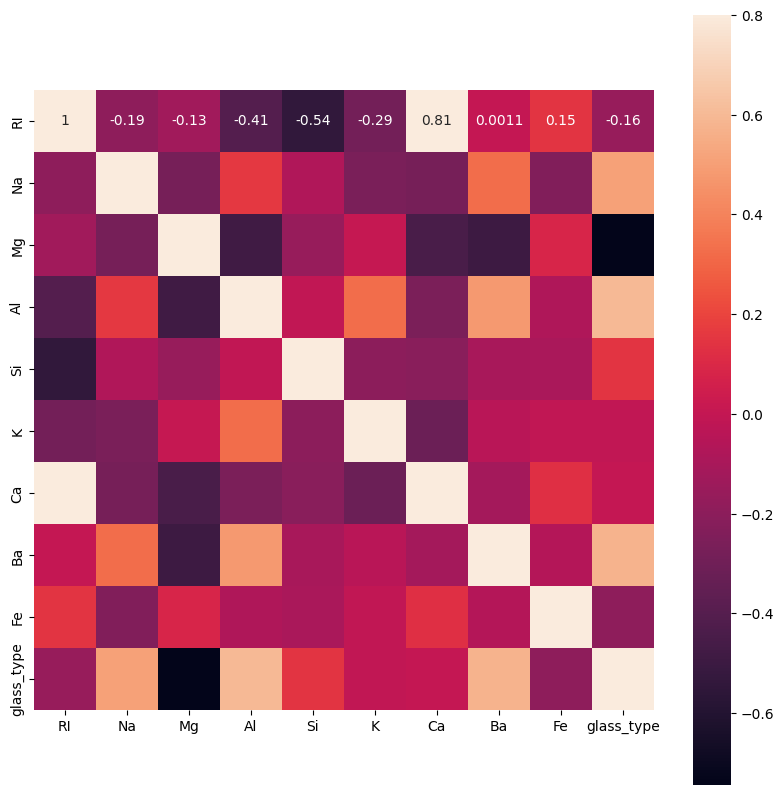

In [33]:
plt.figure(figsize = (10, 10))
corrmat = df.corr()
sns.heatmap(corrmat, annot = True, vmax=.8, square=True)

[]

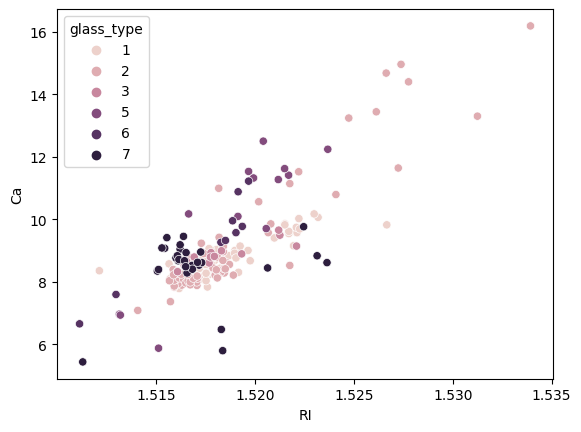

In [41]:
sns.scatterplot(x = df['RI'], y = df['Ca'], hue = df['glass_type'])
plt.plot()

In [48]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0, stratify=y)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print('Shape of x_train = ' + str(x_train.shape))
print('Shape of x_test = ' + str(x_test.shape))
print('Shape of y_train = ' + str(y_train.shape))
print('Shape of y_test = ' + str(y_test.shape))

Shape of x_train = (159, 9)
Shape of x_test = (54, 9)
Shape of y_train = (159,)
Shape of y_test = (54,)


# Prediction

In [66]:
#K-NEAREST NEIGHBORS

Scores = []

for i in range (2,7):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    score = knn.score(x_test,y_test)
    Scores.append(score)
    
    print(knn.score(x_train,y_train))
    print(Scores)

0.8553459119496856
[0.6666666666666666]
0.8238993710691824
[0.6666666666666666, 0.6481481481481481]
0.779874213836478
[0.6666666666666666, 0.6481481481481481, 0.6666666666666666]
0.7861635220125787
[0.6666666666666666, 0.6481481481481481, 0.6666666666666666, 0.6851851851851852]
0.7421383647798742
[0.6666666666666666, 0.6481481481481481, 0.6666666666666666, 0.6851851851851852, 0.6851851851851852]


In [62]:
#LOGISTICS REGRESSION

Scores = []

for i in range (1):
    lgr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter = 100)
    lgr.fit(x_train, y_train)
    score = lgr.score(x_test,y_test)
    Scores.append(score)
    
    print(lgr.score(x_train,y_train))
    print(Scores)

0.6289308176100629
[0.6666666666666666]


In [65]:
#DECISION TREE

Scores = []

for i in range (1):
    dtc = DecisionTreeClassifier(random_state=0)
    dtc.fit(x_train, y_train)
    score = dtc.score(x_test,y_test)
    Scores.append(score)
    
    print(dtc.score(x_train,y_train))
    print(Scores)

1.0
[0.7407407407407407]


In [67]:
#SVC

Scores = []

for i in range (1):
    svc = SVC(gamma='auto')
    svc.fit(x_train, y_train)
    score = svc.score(x_test,y_test)
    Scores.append(score)
    
    print(svc.score(x_train,y_train))
    print(Scores)

0.6855345911949685
[0.7037037037037037]
